Here, we will compare the two time sections, between 1620-1629 and 1632-1640+. First, we will do the initial analysis comparison on that time span.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import cleantools as clnt
import logistic as lg
import mapping_tool as mt

# Load Necessary Frames
the_table = clnt.loadPickle("../data/pickles/table_of_all.pkl")
pre_plague = clnt.betweenYears(the_table, 1620, e_year=1629).copy()
post_plague = clnt.betweenYears(the_table, 1632, e_year=1641).copy()
provenance_sector_profession = the_table[["Apprentice Province", "Apprentice Profession", "Contract Date",
                                          "P", "S", "T"]].copy()

 # Total Contract Counts #

Here I check the number of contracts per time window.

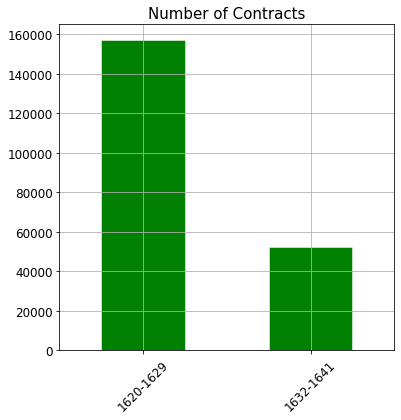

In [21]:
# Create a data frame of size
sizes = pd.DataFrame([[pre_plague.size], [post_plague.size]],
                     columns=["Number of Contracts"],
                     index=["1620-1629", "1632-1641"])

# Plot
fig, ax = plt.subplots(figsize=(6,6))
ax.set_title("Number of Contracts", fontsize=15)
sizes.plot(kind="bar", ax=ax, rot = 45, grid = True,
           fontsize=12, legend = False, color="green")
plt.show()

# Age Distribution #

Now I plot the distribution of age columns in both time windows.

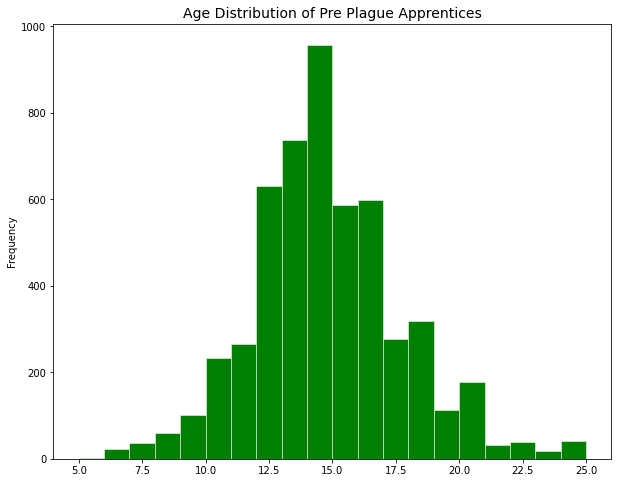

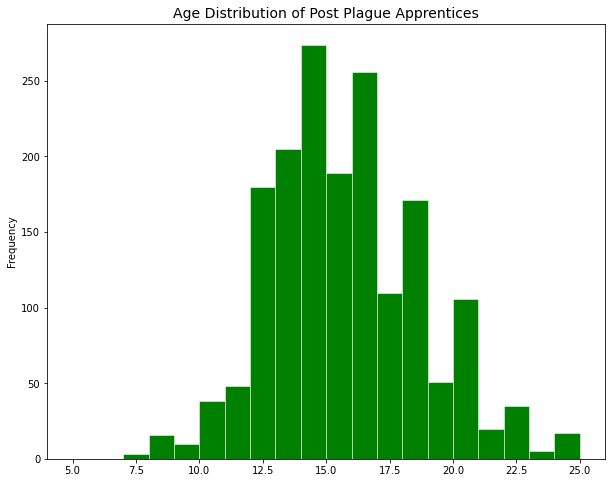

In [28]:
# Plotting Pre
_, ax = plt.subplots(figsize=(10, 8))
ax.set_title("Age Distribution of Pre Plague Apprentices", fontsize=14)
pre_plague["Apprentice Age"].plot(kind="hist", ax=ax,
              range=[5,25], edgecolor='white', linewidth=0.5,
              bins=20, color = "green")
plt.show()

# Plotting Post
_, ax = plt.subplots(figsize=(10, 8))
ax.set_title("Age Distribution of Post Plague Apprentices", fontsize=14)
post_plague["Apprentice Age"].dropna().plot(kind="hist", range=[5,25],
              bins=20, color = "green", ax=ax, edgecolor='white', linewidth=0.5,)
plt.show()

# Apprentices Per Sector Over Time #

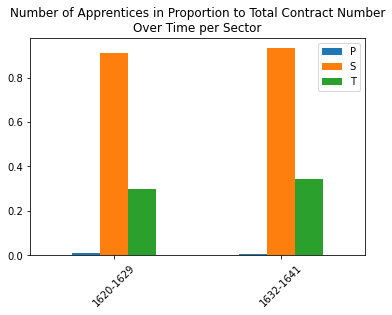

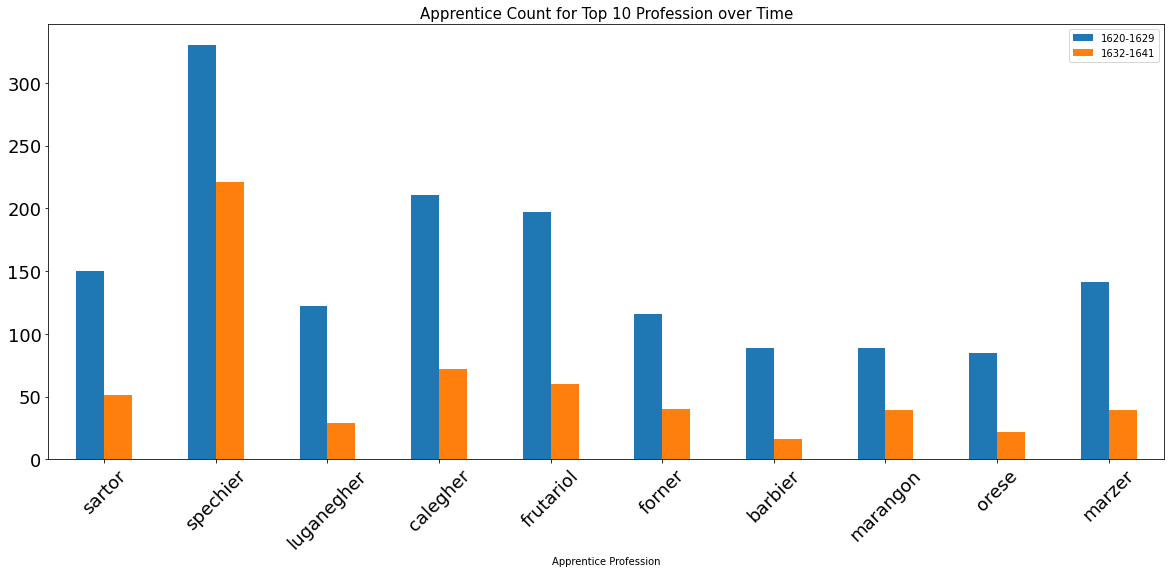

In [30]:
# Constants
start = 1620
end = 1640
gap = 9
gap2 = 12

# We recurse through the time windows, and store them on a data frame
df = pd.DataFrame(columns = ["P", "S", "T"])
for year in range(start, end, gap2):
    temp = clnt.betweenYears(provenance_sector_profession, year, e_year = year + gap)
    df = df.append(pd.Series(temp[["P", "S", "T"]].sum().apply(lambda x:x/len(temp)), name = f"{year}-{year+gap}"))    

# Plotting
df.plot(kind="bar",
        rot=45,
        title="Number of Apprentices in Proportion to Total Contract Number\nOver Time per Sector")
plt.show()

# Then we look in profession scale, and do something similar
df = pd.DataFrame({"Apprentice Profession": provenance_sector_profession["Apprentice Profession"].unique()})
for year in range(start, end, gap2):
    temp = clnt.betweenYears(provenance_sector_profession, year, e_year = year + gap)
    groups = temp.groupby("Apprentice Profession")[["Apprentice Profession"]].agg("count").copy()
    groups.columns = [f"{year}-{year+gap}"]
    df = df.merge(groups, on="Apprentice Profession", how = "left")

# Group according to professions
groups = provenance_sector_profession.groupby("Apprentice Profession")[["Apprentice Profession"]].agg("count").copy()
groups.columns = ["Total"]

# Merge to main data frame
df = df.merge(groups, on="Apprentice Profession", how = "left")
df = df[df["Apprentice Profession"].notna()]
df = df.set_index("Apprentice Profession")

# Plot
_, ax = plt.subplots(figsize=(20,8))
ax.set_title("Apprentice Count for Top 10 Profession over Time", fontsize=15)
df.sort_values("Total", ascending = False)[:10][df.keys()[:-1]].plot(kind='bar',
                                                                     ax=ax,
                                                                     fontsize=18,
                                                                     rot=45)
plt.show()

# Gender Against Tag #

Here, I compare the number of tags like guarantor, master and apprentice against the gender for both time windows.

In [32]:
def genderCount(df, name):
    """Takes a data frame, and a gender name, plots the tag counts, and gives a table."""
    fig, ax = plt.subplots()
    ax.set_title(f"{name.title()} Tag Distribution Per Period", fontsize= 15)
    df.plot(kind="bar", grid = True, rot=45, ax=ax, fontsize=12)
    plt.show()
    
    df = df.copy().transpose()
    df["Proportional Decrease"] = df["1620-1629"] / df["1632-1641"]
    df["Real Difference"] = df["1620-1629"] - df["1632-1641"]
    return df

In [35]:
# Load Frames
sub_tables_ug = clnt.loadPickle("../data/pickles/sub_tables.pkl")

# Merge with necessary times
sub_tables_ug = sub_tables_ug.merge(the_table.reset_index()[["Contract ID", "Contract Date"]],
                                    on="Contract ID")[["Contract ID", "Gender",
                                                       "Is Guarantor", "Is Master",
                                                       "Is Apprentice", "Is Other",
                                                       "Contract Date"]]

# Get time windows
pre_plague_g_n_t = clnt.betweenYears(sub_tables_ug, 1620, e_year=1629).copy()
pos_plague_g_n_t = clnt.betweenYears(sub_tables_ug, 1632, e_year=1641).copy()


# Get male and female counts
fem_plague_counts = pd.DataFrame([pre_plague_g_n_t.loc[pre_plague_g_n_t["Gender"] == "grz:Female",
                                                       ["Is Guarantor", "Is Master", "Is Apprentice",
                                                        "Is Other"]].sum(),
                                  pos_plague_g_n_t.loc[pos_plague_g_n_t["Gender"] == "grz:Female",
                                                       ["Is Guarantor", "Is Master", "Is Apprentice",
                                                        "Is Other"]].sum()],
                                  index=["1620-1629", "1632-1641"])

mal_plague_counts = pd.DataFrame([pre_plague_g_n_t.loc[pre_plague_g_n_t["Gender"] == "grz:Male",
                                                       ["Is Guarantor", "Is Master", "Is Apprentice",
                                                        "Is Other"]].sum(),
                                  pos_plague_g_n_t.loc[pos_plague_g_n_t["Gender"] == "grz:Male",
                                                       ["Is Guarantor", "Is Master", "Is Apprentice",
                                                        "Is Other"]].sum()],
                                  index=["1620-1629", "1632-1641"])



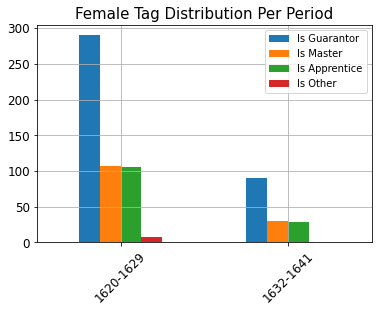

,1620-1629,1632-1641,Proportional Decrease,Real Difference
Is Guarantor,290,90,3.222222,200
Is Master,107,30,3.566667,77
Is Apprentice,106,28,3.785714,78
Is Other,8,0,inf,8


In [36]:
# Plot females
genderCount(fem_plague_counts, "female")

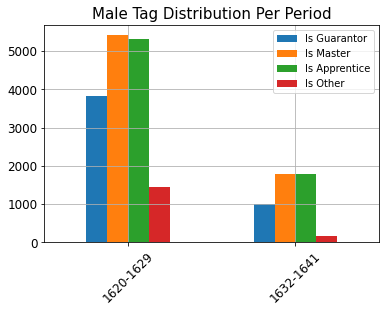

,1620-1629,1632-1641,Proportional Decrease,Real Difference
Is Guarantor,3830,1010,3.792079,2820
Is Master,5414,1793,3.019520,3621
Is Apprentice,5310,1777,2.988182,3533
Is Other,1442,162,8.901235,1280


In [37]:
# Plot males
genderCount(mal_plague_counts, "male")

# Mapping the Geo Distributions #

Here I plot the geographical distributions of apprentices per time window.

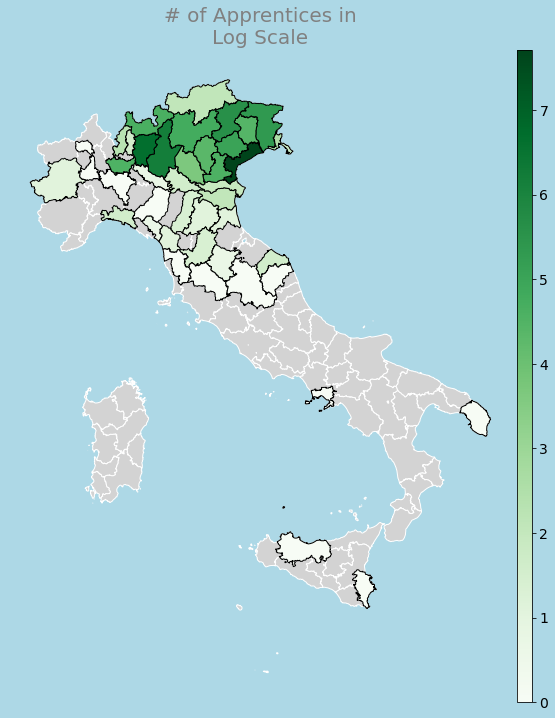

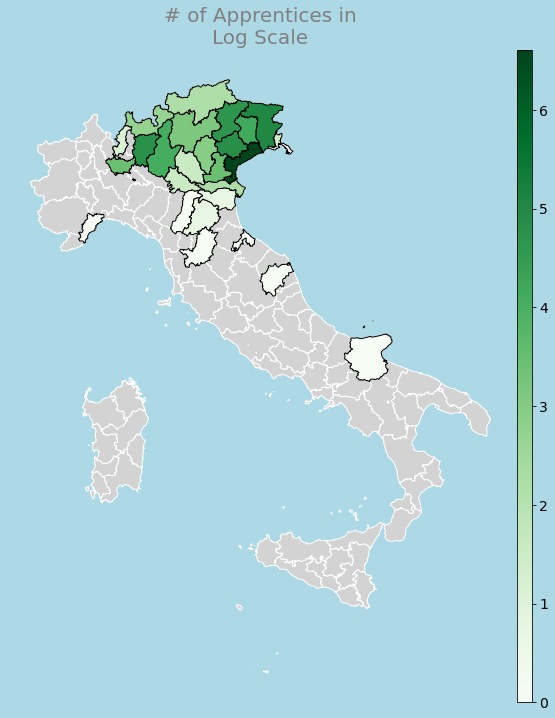

In [39]:
mt.filterNmap(the_table, s_year=1620, e_year=1629)
mt.filterNmap(the_table, s_year=1632, e_year=1641)

# Average Wage of Ducati Payments #

In order to not get affected by different currency values, here I compare the payments made in ducati to see a payment distribution.

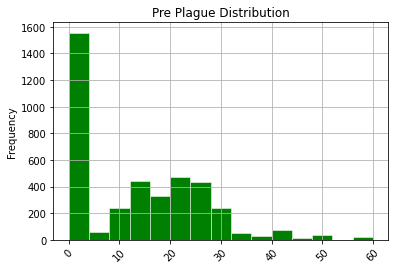

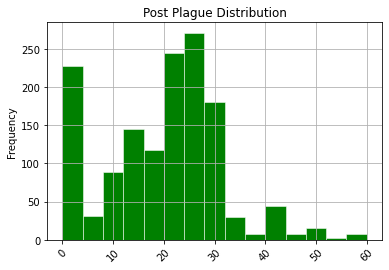

In [42]:
# Load Frames
pre = pre_plague.loc[pre_plague["Has Ducati"] == 1, ["Total Payment Received"]].copy().dropna()
pos = post_plague.loc[post_plague["Has Ducati"] == 1, ["Total Payment Received"]].copy().dropna()

# Plot
for graph, title in zip([pre, pos], ["Pre", "Post"]):
    _, ax = plt.subplots()
    ax.set_title(f"{title} Plague Distribution", fontsize=12)
    graph.astype(int).plot(kind="hist", ax=ax, color="green", bins= 15,
                           range=[0,60], grid=True, rot=45, legend=False,
                           edgecolor='white', linewidth=0.5)
    plt.show()

# Logistic Regression to Estimate Pre or Post Plague #

Here, in order to see further correlations, we will apply logistic regression on rest of the features of a contract, to guess whether a contract is pre or post plague. Unlike the last logistic regression, category and parent label columns are not as unbalanced, so we don't need to create a baseline, and in fact, the calculations work better without the base line assumption.

Before drop na columns 7226
Before outlier clean 3264
Total Size 3264
Training Size 2448
Number of 1s in target 884
Number of 0s in target 1564
         Current function value: 0.574306
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
                                  Results: Logit
Model:                    Logit                  Pseudo R-squared:       0.119     
Dependent Variable:       After Plague           AIC:                    3805.0676 
Date:                     2020-06-26 11:23       BIC:                    3975.6074 
No. Observations:         3264                   Log-Likelihood:         -1874.5   
Df Model:                 27                     LL-Null:                -2127.5   
Df Residuals:             3236                   LLR p-value:            9.2194e-90
Converged:                0.0000                 Scale:                  1.0000    
-----------------------------------------------------------------------------------
 

/home/baran/Work/2019_2020/Internship/Work/env/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


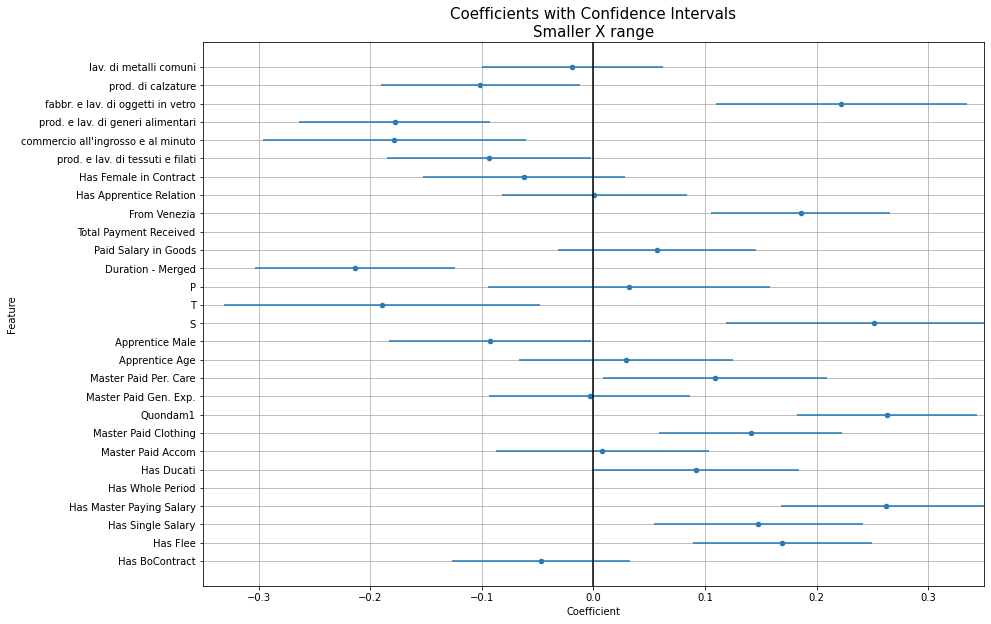

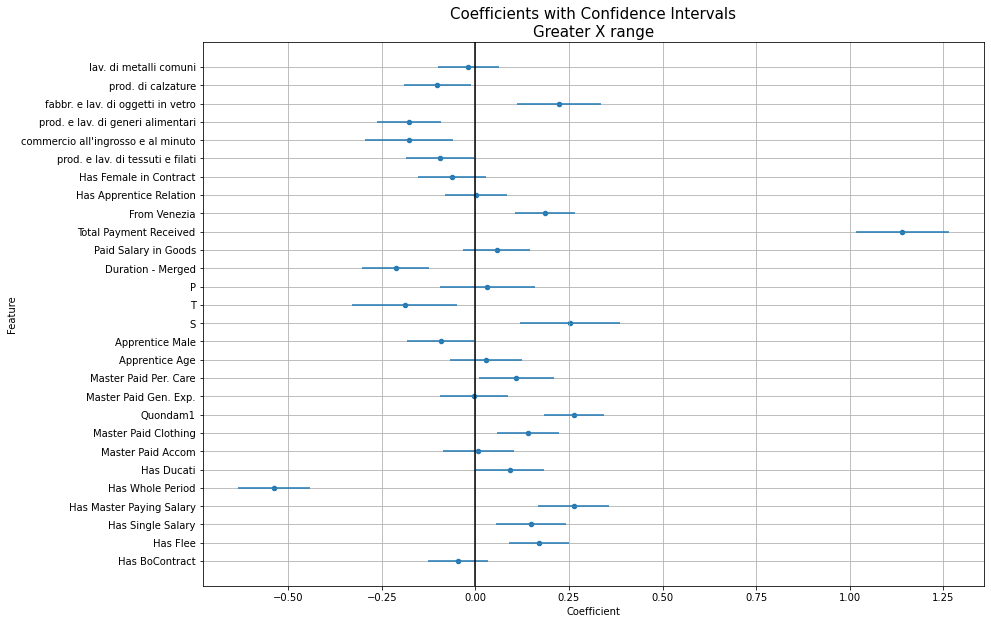

In [24]:
# Load Frames
the_table = clnt.loadPickle("../data/pickles/table_of_all.pkl")
categories = clnt.loadPickle("../data/pickles/generated_categories_appRel_femCon_fromVen.pkl")
del categories["From Venezia"]
the_table = the_table.join(categories)

# Prepare the target column
pre = clnt.betweenYears(the_table, 1620, e_year=1629).copy()
pos = clnt.betweenYears(the_table, 1632, e_year=1641).copy()
pre["After Plague"] = 0
pos["After Plague"] = 1
the_table = pd.concat([pre, pos]).copy()
the_table = lg.dummyLabels(the_table)

# Get the regression object
reg = lg.myRegressor(column_list = [
 'Has BoContract',
 'Has Flee',
 'Has Single Salary',
 'Has Master Paying Salary',
 'Has Whole Period',
 'Has Ducati',
 'Master Paid Accom',
 'Master Paid Clothing',
 'Quondam1',
 'Master Paid Gen. Exp.',
 'Master Paid Per. Care',
 'Apprentice Age',
 'Apprentice Male',
 'S',
 'T',
 'P',
 'Duration - Merged',
 'Paid Salary in Goods',
 'Total Payment Received',
 'From Venezia',
 'Has Apprentice Relation',
 'Has Female in Contract',
 'After Plague',"prod. e lav. di tessuti e filati",
    "commercio all'ingrosso e al minuto",
    "prod. e lav. di generi alimentari",
    "fabbr. e lav. di oggetti in vetro",
    "prod. di calzature",
    "lav. di metalli comuni"])

profession_labels = [
    "prod. e lav. di tessuti e filati", 
    "commercio all'ingrosso e al minuto",
    "prod. e lav. di generi alimentari",
    "fabbr. e lav. di oggetti in vetro",
    "prod. di calzature"
]
reg.loadData(the_table, "After Plague", has_date="", outlier_list=[])
reg.getReport()

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       534
           1       0.71      0.52      0.60       282

    accuracy                           0.76       816
   macro avg       0.74      0.70      0.71       816
weighted avg       0.75      0.76      0.75       816



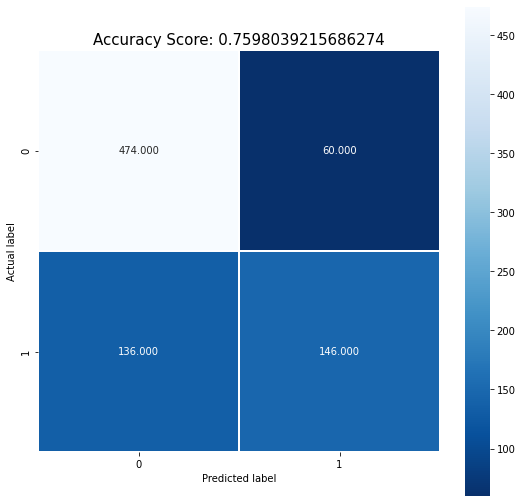

In [17]:
reg.applyLogistic()

Oversample Size 3128
Number of 1s in target 1564
Number of 0s in target 1564
Optimization terminated successfully.
         Current function value: 0.574597
         Iterations: 34
         Function evaluations: 35
         Gradient evaluations: 35
                                  Results: Logit
Model:                    Logit                  Pseudo R-squared:       0.118     
Dependent Variable:       After Plague           AIC:                    3802.9691 
Date:                     2020-06-26 10:43       BIC:                    3961.3275 
No. Observations:         3264                   Log-Likelihood:         -1875.5   
Df Model:                 25                     LL-Null:                -2127.5   
Df Residuals:             3238                   LLR p-value:            1.1244e-90
Converged:                1.0000                 Scale:                  1.0000    
-----------------------------------------------------------------------------------
                              

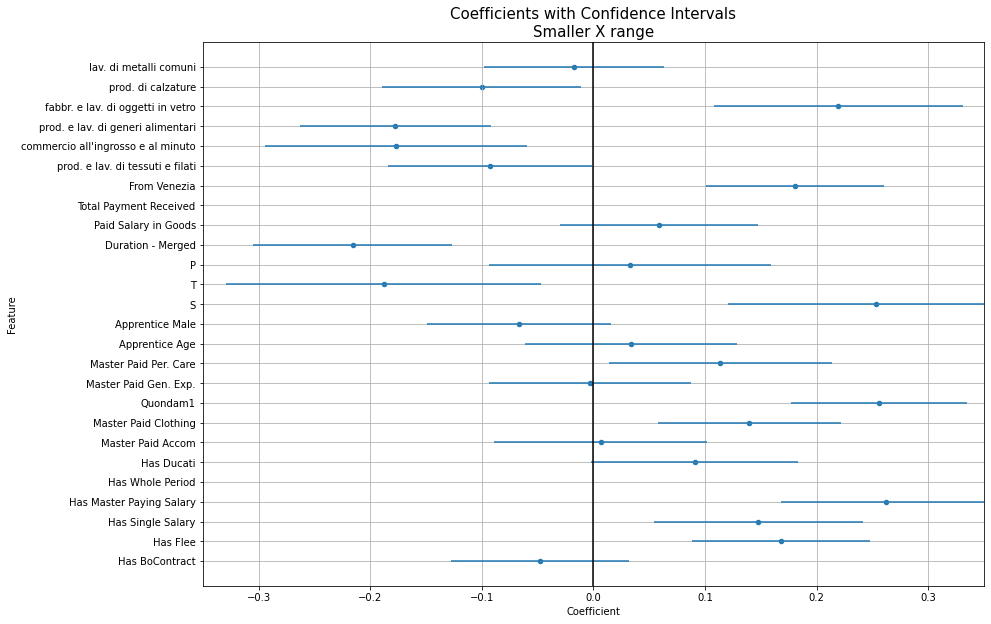

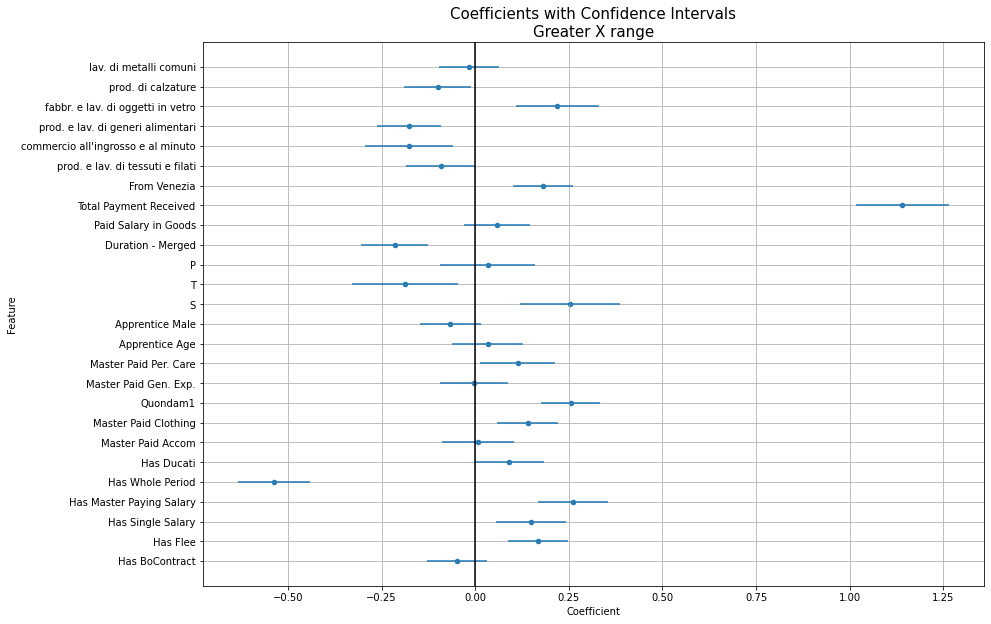

In [18]:
reg.overSample()
reg.getReport()

['Has Flee', 'Has Single Salary', 'Has Master Paying Salary', 'Has Whole Period', 'Quondam1', 'S', 'T', 'Duration - Merged', 'Total Payment Received', 'From Venezia', "commercio all'ingrosso e al minuto", 'prod. e lav. di generi alimentari', 'fabbr. e lav. di oggetti in vetro']
Before outlier clean 3264
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       534
           1       0.71      0.51      0.59       282

    accuracy                           0.76       816
   macro avg       0.74      0.70      0.71       816
weighted avg       0.75      0.76      0.75       816



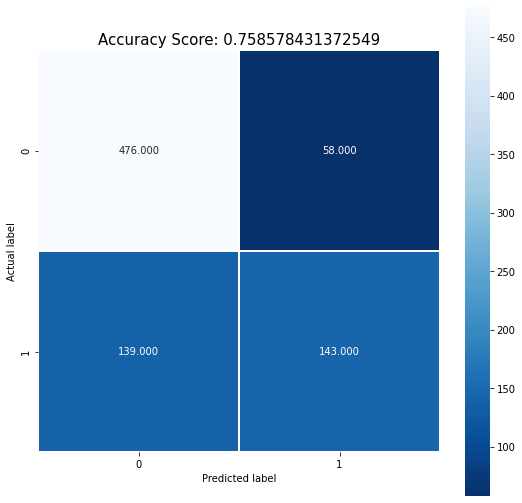

Optimization terminated successfully.
         Current function value: 0.579928
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
                                  Results: Logit
Model:                    Logit                  Pseudo R-squared:       0.110     
Dependent Variable:       After Plague           AIC:                    3811.7717 
Date:                     2020-06-26 10:43       BIC:                    3890.9510 
No. Observations:         3264                   Log-Likelihood:         -1892.9   
Df Model:                 12                     LL-Null:                -2127.5   
Df Residuals:             3251                   LLR p-value:            7.7576e-93
Converged:                1.0000                 Scale:                  1.0000    
-----------------------------------------------------------------------------------
                                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------

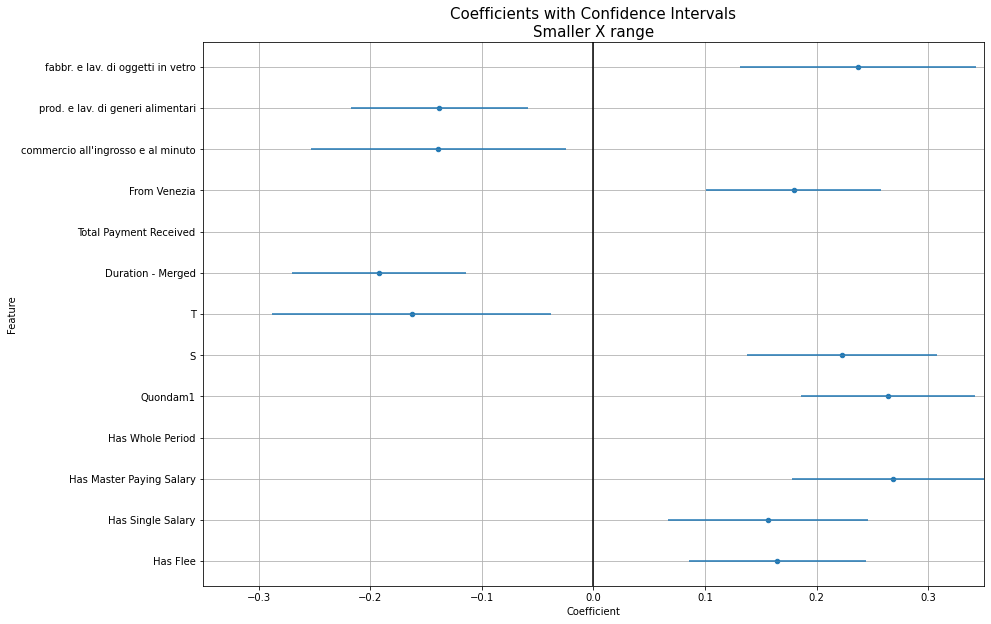

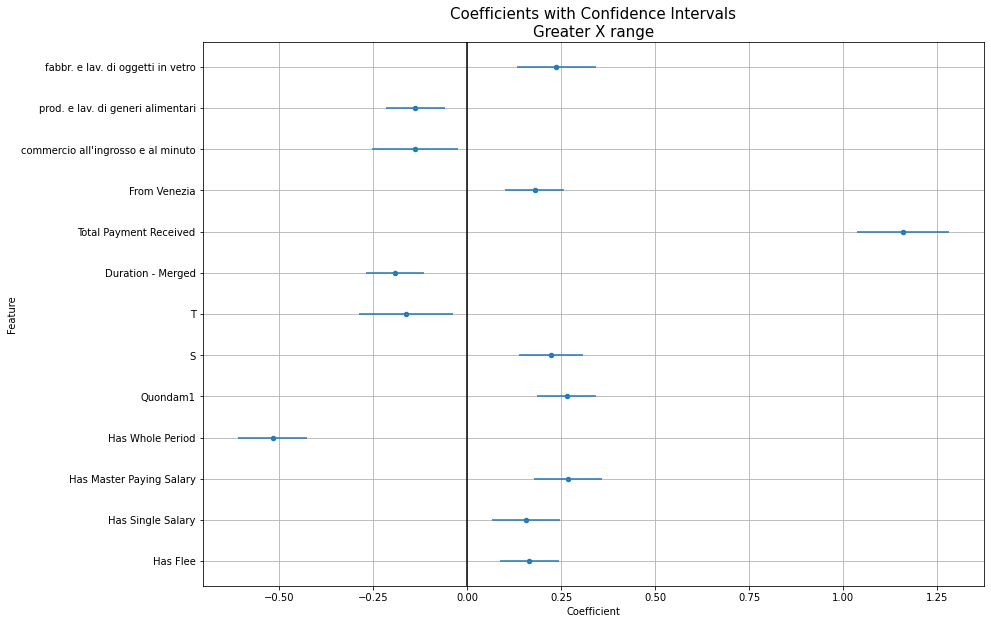

In [19]:
reg.selectFeatures()
reg.getReport()